## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

* loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term - The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate - Interest Rate on the loan
* installment - The monthly payment owed by the borrower if the loan originates.
* grade - LC assigned loan grade
* sub_grade - LC assigned loan subgrade
* emp_title	- The job title supplied by the Borrower when applying for the loan.
* emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership - The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
* annual_inc - The self-reported annual income provided by the borrower during registration.
* verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified
* issue_d - The month which the loan was funded
* loan_status - Current status of the loan
* purpose - A category provided by the borrower for the loan request.
* title - The loan title provided by the borrower
* zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.
* addr_state - The state provided by the borrower in the loan application
* dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line - The month the borrower's earliest reported credit line was opened
* open_acc - The number of open credit lines in the borrower's credit file.
* pub_rec - Number of derogatory public records
* revol_bal - Total credit revolving balance
* revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc	- The total number of credit lines currently in the borrower's credit file
* initial_list_status - The initial listing status of the loan. Possible values are – W, F
* application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc - Number of mortgage accounts.
* pub_rec_bankruptcies - Number of public record bankruptcies

#### Importing visualization libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_data_info= pd.read_csv('../data/lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
loan_data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


*As there are a lot of features, let's make function that will give the info about the desirable feature.*

In [4]:
def feature_info(col_name):
    print(loan_data_info.loc[col_name]['Description'])

In [5]:
feature_info('loan_status')

Current status of the loan


In [6]:
loan_data = pd.read_csv('../data/lending_club_loan_two.csv')

In [7]:
loan_data.head(3).transpose()

,0,1,2
loan_amnt,10000.0,8000.0,15600.0
term,36 months,36 months,36 months
int_rate,11.44,11.99,10.49
installment,329.48,265.68,506.97
grade,B,B,B
sub_grade,B4,B5,B3
emp_title,Marketing,Credit analyst,Statistician
emp_length,10+ years,4 years,< 1 year
home_ownership,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

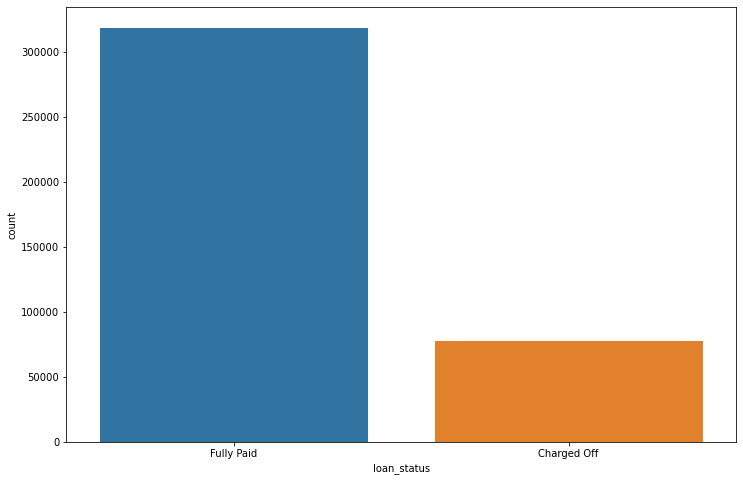

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'loan_status', data = loan_data)

*We can clearly see that our dataset is not equally distrubited in terms of loan status.*

C:\Users\xx\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

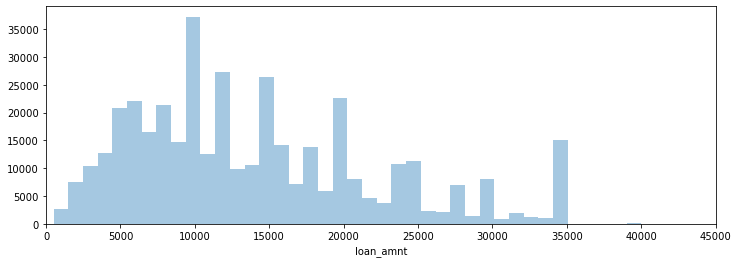

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(loan_data['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

<AxesSubplot:>

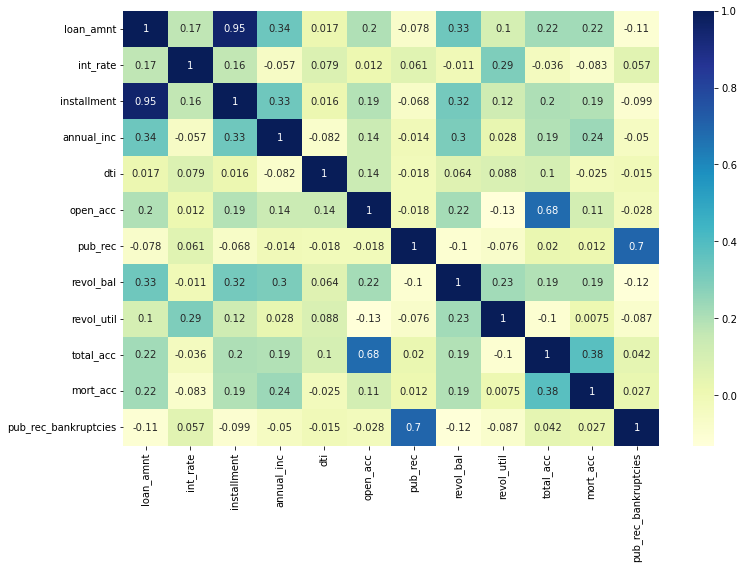

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.corr(), annot = True, cmap = 'YlGnBu')

# PreProcessing of the Data


In [12]:
loan_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:>

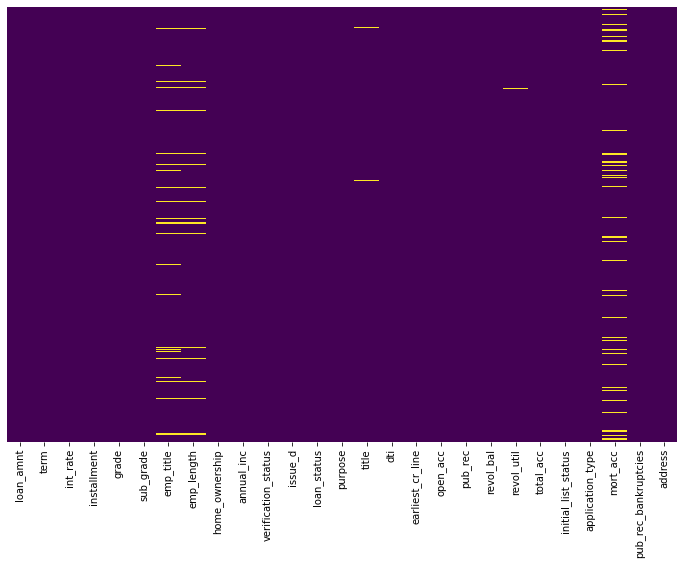

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

### Overall, these feature columns contain missing values:
* emp_title
* emp length
* title
* revol_util
* mort_acc
* pub_rec_bankruptcies

### *1) emp_title*

In [14]:
feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [15]:
loan_data['emp_title'].nunique()

173105

*There are too many titles to tranform every title to a unique dummy for a model. Thus, we will remove the whole column of the feature emp_title.* 

In [16]:
loan_data = loan_data.drop('emp_title', axis = 1)

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

### *2) emp_length*

In [18]:
feature_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [19]:
loan_data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [20]:
loan_data['emp_length'].nunique()

11

In [21]:
emp_length_order = [ '< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

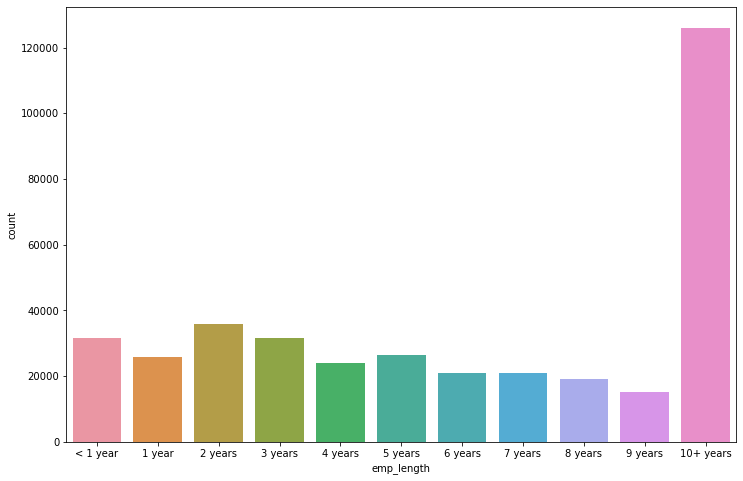

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'emp_length', data = loan_data, order = emp_length_order)

*Let's check if emp_length have a strong impact on loan status.*

<AxesSubplot:xlabel='emp_length', ylabel='count'>

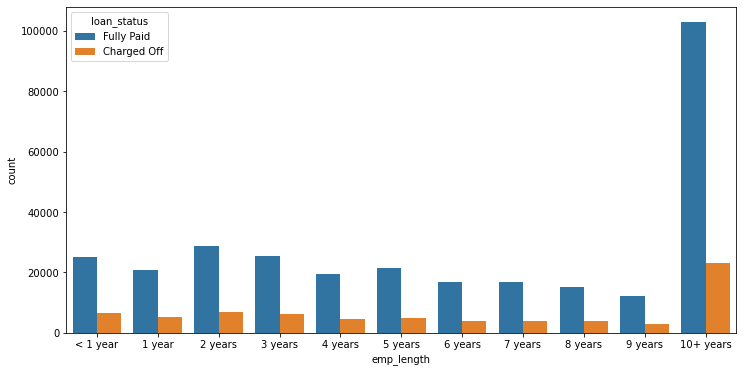

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'emp_length',
              data = loan_data,
              order = emp_length_order,
              hue = 'loan_status')

In [24]:
loan_data['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [25]:
emp_co = loan_data[loan_data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = loan_data[loan_data['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [26]:
emp_len = emp_co/emp_fp

In [27]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

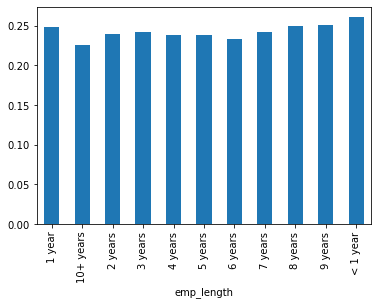

In [28]:
emp_len.plot(kind = 'bar')

*Charge off rates are extremely similar across all employment lengths. Thus, let's drop emp_length column.*

In [29]:
loan_data = loan_data.drop('emp_length', axis = 1)

In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

<AxesSubplot:>

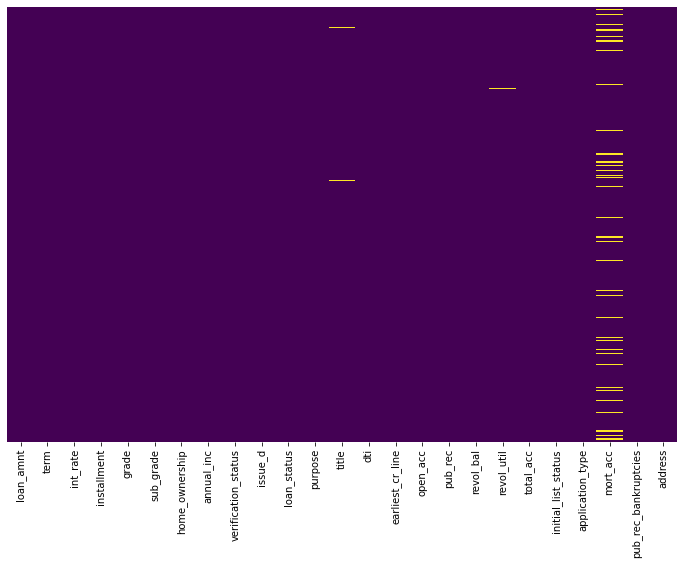

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

### *3) title*

In [32]:
loan_data['title'].nunique()

48817

In [33]:
loan_data[['title', 'purpose']].head()

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card


*We can notice the similarity of purpose and title, thus we will drop the title column from our dataset.*

In [34]:
loan_data = loan_data.drop('title', axis = 1)

### *4) mort_acc*

In [35]:
loan_data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

*We would attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns. Let's review the other columns to see which most highly correlates to mort_acc*

In [36]:
print("Correlation with the mort_acc column")
loan_data.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

*Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:*

In [37]:
print("Mean of mort_acc column per total_acc")
loan_data.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

*Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.*

In [38]:
total_acc_avg = loan_data.groupby('total_acc').mean()['mort_acc']

In [39]:
total_acc_avg[2.0]

0.0

In [40]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [41]:
loan_data['mort_acc'] = loan_data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [42]:
loan_data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

### *5,6) revol_util, pub_rec_bancruptcies*

In [43]:
loan_data.isnull().sum()/len(loan_data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

*revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. We will remove the rows that are missing those values in those columns with dropna().*

In [44]:
loan_data = loan_data.dropna()

In [45]:
loan_data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Categorical Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [46]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

### Overall, these feature columns contain categorical values:
* term
* grade
* sub_grade
* home_ownership
* verification_status
* issue_d
* loan_status*
* purpose
* earliest_cr_line
* initial_list_status
* application_type
* adress

In [47]:
loan_data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### *1) term*

In [48]:
loan_data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [49]:
loan_data['term'] = loan_data['term'].apply(lambda term: int(term[:3]))

In [50]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

### *2) grade*

**We already know grade is part of sub_grade, so we will just drop the grade feature.**

In [51]:
loan_data = loan_data.drop('grade',axis=1)

In [52]:
loan_data['sub_grade'].value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

*We can convert sugrade into dummies. However, the list of object values can be transform into a integer values. The grades are ['A','B','C','D','E'] and every grade has its subgrade which is represented with number in range from 1 to 5. Thus, in total, there are 35 unique object values. We will tranform them into integer values from 0 to 34 and the model will recognize them as the values has monotonous behavior.*

In [53]:
subgrade_keys = sorted(loan_data['sub_grade'].unique())
subgrade_keys

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [54]:
subgrade_values = [i for i in range(len(subgrade_keys))]
subgrade_dic = {subgrade_keys[i]: subgrade_values[i] for i in range(len(subgrade_keys))}
loan_data = loan_data.replace({'sub_grade': subgrade_dic})

In [55]:
#subgrade_dummies = pd.get_dummies(loan_data['sub_grade'], drop_first = True)
#loan_data = pd.concat([loan_data.drop('sub_grade', axis = 1), subgrade_dummies], axis = 1)
#loan_data.columns

#outpout:
#Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
#       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
#       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
#       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
#       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
#       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
#       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
#       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
#       'G5'],
#      dtype='object')

*Obiously, adding so many features (35) to model our data, can affect the precission of our prediction. Thus, we will stick with the representation of the numerical values.*

In [56]:
loan_data['sub_grade'].value_counts()

7     26611
8     25558
10    23609
11    22541
6     22457
9     22046
12    21178
13    20232
5     19140
4     18500
14    18215
15    15947
3     15763
16    13916
17    12196
18    11625
2     10537
0      9717
19     9680
1      9539
20     7906
21     7410
22     6196
23     5354
24     4561
25     3530
26     2756
27     2277
28     1782
29     1395
30     1057
31      752
32      552
33      371
34      313
Name: sub_grade, dtype: int64

In [57]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  int64  
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

### *3) verification_status*
### *4) application_type*
### *5) initial_list_status*
### *6) purpose*

*We will convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.*

In [58]:
dummies = pd.get_dummies(loan_data[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)
loan_data = loan_data.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1)
loan_data = pd.concat([loan_data, dummies], axis = 1)

In [59]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   home_ownership                       395219 non-null  object 
 6   annual_inc                           395219 non-null  float64
 7   issue_d                              395219 non-null  object 
 8   loan_status                          395219 non-null  object 
 9   dti                                  395219 non-null  float64
 10  earliest_cr_line                     395219 non-null  object 
 11  open_acc     

### *7) home_ownership*

In [60]:
loan_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

*We will convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.*

In [61]:
loan_data['home_ownership'] = loan_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [62]:
dummies = pd.get_dummies(loan_data['home_ownership'], drop_first = True)
loan_data = loan_data.drop('home_ownership', axis = 1)
loan_data = pd.concat([loan_data, dummies], axis = 1)

In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   annual_inc                           395219 non-null  float64
 6   issue_d                              395219 non-null  object 
 7   loan_status                          395219 non-null  object 
 8   dti                                  395219 non-null  float64
 9   earliest_cr_line                     395219 non-null  object 
 10  open_acc                             395219 non-null  float64
 11  pub_rec      

### *8) address*

In [64]:
loan_data['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [65]:
loan_data['zip_code'] = loan_data['address'].apply(lambda address: address[-5:])

In [66]:
loan_data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [67]:
dummies = pd.get_dummies(loan_data['zip_code'], drop_first = True)
loan_data = loan_data.drop(['zip_code', 'address'], axis = 1)
loan_data = pd.concat([loan_data, dummies], axis = 1)

In [68]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   annual_inc                           395219 non-null  float64
 6   issue_d                              395219 non-null  object 
 7   loan_status                          395219 non-null  object 
 8   dti                                  395219 non-null  float64
 9   earliest_cr_line                     395219 non-null  object 
 10  open_acc                             395219 non-null  float64
 11  pub_rec      

### *9) issue_d*

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, we will drop this feature.**

In [69]:
feature_info('issue_d')

The month which the loan was funded


In [70]:
loan_data = loan_data.drop('issue_d', axis = 1)

In [71]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   annual_inc                           395219 non-null  float64
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   earliest_cr_line                     395219 non-null  object 
 9   open_acc                             395219 non-null  float64
 10  pub_rec                              395219 non-null  float64
 11  revol_bal    

### *10) earliest_cr_line*

*This appears to be a historical time stamp feature. We will extract the year from this feature using an .apply function, then convert it to a numeric feature. Alsom, we will set this new data to a feature column called 'earliest_cr_year'.Then we will drop the earliest_cr_line feature.*

In [72]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [73]:
loan_data['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [74]:
loan_data['earliest_cr_year'] = loan_data['earliest_cr_line'].apply(lambda date: int(date[-4:]))
loan_data = loan_data.drop('earliest_cr_line', axis = 1)

In [75]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   annual_inc                           395219 non-null  float64
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

### *11) loan_status*

**We will create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"**

In [76]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [77]:
loan_data['loan_repaid'] = loan_data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [78]:
loan_data[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [79]:
loan_data = loan_data.drop('loan_status', axis = 1)

In [80]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   sub_grade                            395219 non-null  int64  
 5   annual_inc                           395219 non-null  float64
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

*Now, our dataset is ready to be train, as there are not missing values as well as all feature values are in numerical type.*

## Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = loan_data.drop('loan_repaid',axis = 1).values
y = loan_data['loan_repaid'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

## Normalizing the Data

**We will use a MinMaxScaler to normalize the feature data X_train and X_test. We don't want data leakage from the test set so we only fit on the X_train data.**

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

# Creating the Model

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
model = Sequential()

model.add(Dense(units=45, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=22, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=11, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [90]:
model.fit(x = X_train, 
          y = y_train,
          epochs = 25, 
          batch_size = 256,
          validation_data = (X_test, y_test), verbose = 0
)

In [91]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

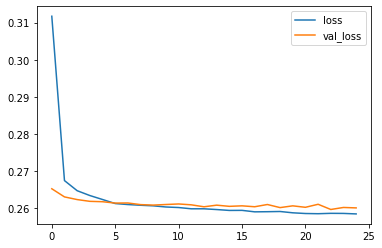

In [92]:
losses[['loss', 'val_loss']].plot()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**We can notice there is small recall value when we predict 0 (not fully paid loan), which is normal, as our data is not equally distributed and this can be noticed on the graph below:**

<AxesSubplot:xlabel='loan_repaid', ylabel='count'>

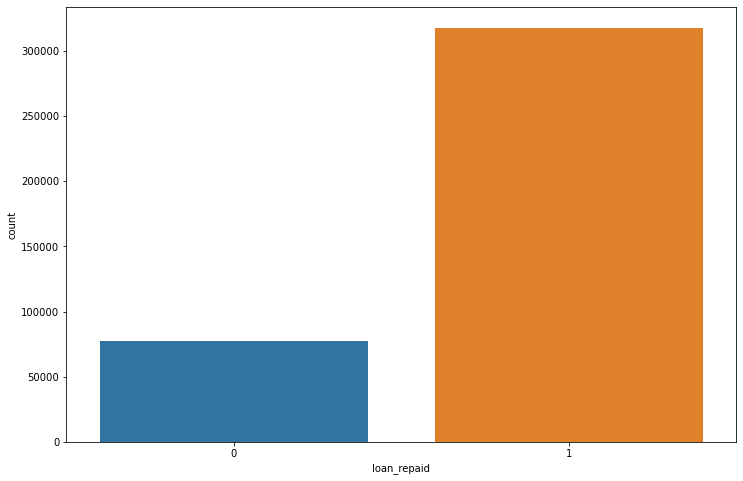

In [96]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'loan_repaid', data = loan_data)

In [97]:
confusion_matrix(y_test, predictions)

array([[ 6742,  8916],
       [   18, 63368]], dtype=int64)

*Let's generate random custoemr from our dataset. Given the customer below, would you offer this person a loan?*

In [98]:
import random
random.seed(101)
random_ind = random.randint(0,len(loan_data))

new_customer = loan_data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                              25000.00
term                                      60.00
int_rate                                  18.24
installment                              638.11
sub_grade                                 19.00
annual_inc                             61665.00
dti                                       30.11
open_acc                                  16.00
pub_rec                                    0.00
revol_bal                              27778.00
revol_util                                65.50
total_acc                                 46.00
mort_acc                                   0.00
pub_rec_bankruptcies                       0.00
verification_status_Source Verified        0.00
verification_status_Verified               1.00
application_type_INDIVIDUAL                1.00
application_type_JOINT                     0.00
initial_list_status_w                      0.00
purpose_credit_card                        0.00
purpose_debt_consolidation              

In [99]:
(model.predict(new_customer.values.reshape(1,45)) > 0.5).astype('int32')

array([[1]])

In [100]:
loan_data.iloc[random_ind]['loan_repaid']

1.0

*Based on our model, the random generated customer is trust worthy for a loan and comparing with the actual status (loan_repaid), indeed our random generated customer has repaid his loan.*